In [16]:
import quandl
quandl.ApiConfig.api_key = "idNBU8ZQFvkUE9fDgWyz"
import numpy as np
import pandas as pd

In [17]:
prices = quandl.get_table('SHARADAR/SEP', ticker=['AAPL', 'KO', 'NKE'], date={'gte':'2000-01-01', 'lte':'2018-12-31'}, paginate=True)

In [18]:
pivoted = prices.pivot(index='date', columns='ticker', values='close')
pivoted.head()

ticker,AAPL,KO,NKE
date,,,
2018-09-04,228.36,44.76,79.60
2018-09-05,226.87,45.38,79.92
2018-09-06,223.10,45.77,80.40
2018-09-07,221.30,45.72,80.30
2018-09-10,218.33,46.06,82.10


In [19]:
cov_matrix = pivoted.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

ticker,AAPL,KO,NKE
ticker,,,
AAPL,0.000553,0.000044,0.000266
KO,0.000044,0.000113,0.000088
NKE,0.000266,0.000088,0.000482


In [20]:
e_r = pivoted.resample('Y').last().pct_change().mean()
e_r

ticker
AAPL   NaN
KO     NaN
NKE    NaN
dtype: float64

In [21]:
sd = pivoted.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
sd

ticker
AAPL    0.371778
KO      0.168373
NKE     0.347082
dtype: float64

In [22]:
assets = pd.concat([e_r, sd], axis=1)
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
ticker,,
AAPL,NaN,0.371778
KO,NaN,0.168373
NKE,NaN,0.347082


In [23]:
p_ret = []
p_vol = []
p_weights = []

num_assets = len(pivoted.columns)
num_portfolios = 1000

In [24]:
for portfolio in range(num_portfolios):
    #weights = [.25, .75]
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, e_r)
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()
    sd = np.sqrt(var)
    ann_sd = sd*np.sqrt(250)
    p_vol.append(ann_sd)
weights

array([0.33109878, 0.30099767, 0.36790356])

In [25]:
data = {'Returns':p_ret, 'Volatility':p_vol}

In [26]:
for counter, symbol in enumerate(pivoted.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [27]:
portfolios  = pd.DataFrame(data)
portfolios.head()

,Returns,Volatility,AAPL weight,KO weight,NKE weight
0,NaN,0.252873,0.416189,0.246827,0.336984
1,NaN,0.163149,0.072066,0.890650,0.037284
2,NaN,0.279386,0.583580,0.172884,0.243536
3,NaN,0.230687,0.166596,0.365915,0.467489
4,NaN,0.219744,0.113127,0.435077,0.451796


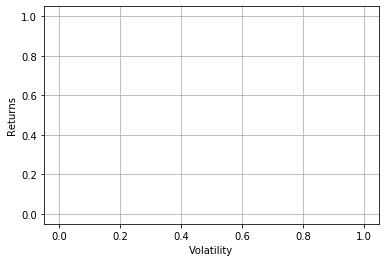

In [28]:
portfolios.plot.scatter(x='Volatility', y='Returns', grid=True)

In [29]:
op_space = pd.concat([portfolios, assets])
op_space

,Returns,Volatility,AAPL weight,KO weight,NKE weight
0,NaN,0.252873,0.416189,0.246827,0.336984
1,NaN,0.163149,0.072066,0.890650,0.037284
2,NaN,0.279386,0.583580,0.172884,0.243536
3,NaN,0.230687,0.166596,0.365915,0.467489
4,NaN,0.219744,0.113127,0.435077,0.451796
...,...,...,...,...,...
998,NaN,0.294851,0.630482,0.118568,0.250950
999,NaN,0.239415,0.331099,0.300998,0.367904
AAPL,NaN,0.371778,NaN,NaN,NaN
KO,NaN,0.168373,NaN,NaN,NaN


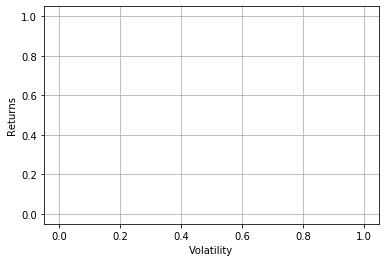

In [30]:
op_space.plot.scatter(x='Volatility', y='Returns', grid=True)